In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import cv2
import pandas as pd
from skimage.color import rgb2gray
from skimage import feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [2]:
list1=os.listdir('C:/chest_x-ray/train_normal')
list2=os.listdir('C:/chest_x-ray/train_pneumonia') 
list3=os.listdir('C:/chest_x-ray/test_normal')
list4=os.listdir('C:/chest_x-ray/test_pneumonia') 
print('list1 :',len(list1))
print('list2 :',len(list2))
print('list3 :',len(list3))
print('list4 :',len(list4))

list1 : 1341
list2 : 3875
list3 : 234
list4 : 390


In [3]:
feat1=np.zeros((1,52)) 
for i in range(len(list1)):
    img_old=plt.imread('C:/chest_x-ray/train_normal/'+list1[i])
    img_gray=rgb2gray(img_old)
    img_gray_resized=cv2.resize(img_gray,(300,180),interpolation=cv2.INTER_AREA)
    lbp=feature.local_binary_pattern(img_gray_resized,method="uniform",P=8,R=1)
    hist,_=np.histogram(lbp.ravel(),bins=np.arange(0,53),range=(0,52))
    feat1=np.vstack((feat1,hist))
feat1=feat1[1:,:]
print('first class train shape :',feat1.shape)

feat2=np.zeros((1,52)) 
for i in range(len(list2)):
    img_old=plt.imread('C:/chest_x-ray/train_pneumonia/'+list2[i])
    img_gray=rgb2gray(img_old)
    img_gray_resized=cv2.resize(img_gray,(300,180),interpolation=cv2.INTER_AREA)
    lbp=feature.local_binary_pattern(img_gray_resized,method="uniform",P=8,R=1)
    numPoints=50
    hist,_=np.histogram(lbp.ravel(),bins=np.arange(0,numPoints+3),range=(0,numPoints+2))
    feat2=np.vstack((feat2,hist))
feat2=feat2[1:,:]
print('second class train shape :',feat2.shape)

feat3=np.zeros((1,52)) 
for i in range(len(list3)):
    img_old=plt.imread('C:/chest_x-ray/test_normal/'+list3[i])
    img_gray=rgb2gray(img_old)
    img_gray_resized=cv2.resize(img_gray,(300,180),interpolation=cv2.INTER_AREA)
    lbp=feature.local_binary_pattern(img_gray_resized,method="uniform",P=8,R=1)
    numPoints=50
    hist,_=np.histogram(lbp.ravel(),bins=np.arange(0,numPoints+3),range=(0,numPoints+2))
    feat3=np.vstack((feat3,hist))
feat3=feat3[1:,:]
print('first class test shape :',feat3.shape)

feat4=np.zeros((1,52)) 
for i in range(len(list4)):
    img_old=plt.imread('C:/chest_x-ray/test_pneumonia/'+list4[i])
    img_gray=rgb2gray(img_old)
    img_gray_resized=cv2.resize(img_gray,(300,180),interpolation=cv2.INTER_AREA)
    lbp=feature.local_binary_pattern(img_gray_resized,method="uniform",P=8,R=1)
    numPoints=50
    hist,_=np.histogram(lbp.ravel(),bins=np.arange(0,numPoints+3),range=(0,numPoints+2))
    feat4=np.vstack((feat4,hist))
feat4=feat4[1:,:]
print('second class test shape :',feat4.shape)

first class train shape : (1341, 52)
second class train shape : (3875, 52)
first class test shape : (234, 52)
second class test shape : (390, 52)


In [4]:
indices=np.random.randint(0,feat2.shape[0],1341)
feat2=feat2[indices,:]
X_train=np.vstack((feat1,feat2))
X_test=np.vstack((feat3,feat4))
y_train=np.hstack((np.zeros(1341),np.ones(1341)))
y_test=np.hstack((np.zeros(234),np.ones(390)))
print(X_train.shape,'  ',y_train.shape,'  ',X_test.shape,'  ',y_test.shape)

(2682, 52)    (2682,)    (624, 52)    (624,)


In [5]:
arr1=np.random.permutation(2682)
X_train=X_train[arr1,:]
y_train=y_train[arr1]

arr2=np.random.permutation(624)
X_test=X_test[arr2,:]
y_test=y_test[arr2]

In [6]:
X_train=SelectKBest(f_classif,k="all").fit_transform(X_train,y_train)   
X_test=SelectKBest(f_classif,k="all").fit_transform(X_test,y_test)
print(X_train.shape,'  ',X_test.shape)

(2682, 52)    (624, 52)


C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] are constant.
  UserWarning)
C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] are constant.
  UserWarning)
C:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [7]:
acc=[]
for j in range((X_train.shape[1])):
    clf=SVC(kernel='linear',random_state=0)
    clf.fit(X_train[:,:(j+1)],y_train) 
    y_pred=clf.predict(X_test[:,:(j+1)])
    acc.append(accuracy_score(y_test,y_pred))

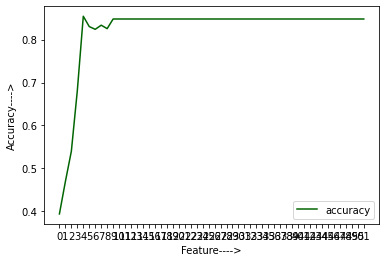

maximum accuracy obtained : 0.8541666666666666
features taken for maximum accuracy obtained  : 5


In [8]:
plt.plot(acc,color='darkgreen')
plt.xlabel('Feature---->')
plt.ylabel('Accuracy---->')
plt.legend(['accuracy'])
plt.xticks(np.arange(0,52,1))
plt.show()
print('maximum accuracy obtained :',np.max(acc))
print('features taken for maximum accuracy obtained  :',np.argmax(acc)+1)